In [1]:
import pyfolio_fork_aprm as pf
import utils
import empyrical as ep
import scipy

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Kevin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
returns_df = utils.get_returns_df()

In [3]:
rf = utils.get_risk_free_returns_series(returns_df)

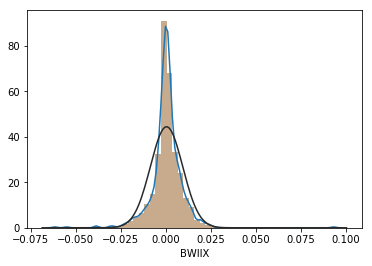

In [9]:
sns.distplot(returns_df['BWIIX'].dropna())
sns.distplot(returns_df['BWIIX'].dropna(), kde=False, fit=scipy.stats.norm)


In [8]:
fund_list = returns_df.columns.values

In [30]:
def distplot(fund):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    sns.distplot(returns_df[fund].dropna(), kde=False, fit=scipy.stats.norm)
    fig.savefig(fund)

In [15]:
returns_df

,JFUAX,JLCAX,JDEAX,OEIAX,JFTAX,BWIIX,BSPIX,MAIIX,SPX,MXEA,MXWO
2015-06-02 00:00:00+00:00,0.003268,-0.000984,-0.002040,0.005111,0.004375,0.002000,-0.000977,0.004508,-0.000956,0.006633,0.002390
2015-06-03 00:00:00+00:00,0.004886,0.002954,0.002862,0.010169,0.007744,0.003992,0.002387,0.007479,0.002306,0.007195,0.004349
2015-06-04 00:00:00+00:00,-0.007023,-0.008835,-0.007746,-0.011745,-0.010567,-0.009940,-0.008588,-0.011136,-0.008607,-0.006884,-0.007998
2015-06-05 00:00:00+00:00,-0.003264,0.000660,0.000822,-0.013016,-0.013107,-0.005020,-0.001496,-0.013514,-0.001395,-0.019839,-0.008422
2015-06-08 00:00:00+00:00,-0.009279,-0.008248,-0.007800,-0.003440,-0.002951,-0.005045,-0.006349,-0.001522,-0.006306,-0.000953,-0.004511
2015-06-09 00:00:00+00:00,-0.000551,0.001331,0.000000,-0.005754,-0.003947,-0.001014,0.000476,-0.004573,0.000443,-0.002777,-0.000286
2015-06-10 00:00:00+00:00,0.016538,0.012292,0.011585,0.020833,0.018821,0.014213,0.012138,0.020674,0.012110,0.018478,0.014383
2015-06-11 00:00:00+00:00,0.001627,0.002297,0.002454,0.002834,0.002431,0.003003,0.001999,0.003001,0.002031,0.001757,0.001822
2015-06-12 00:00:00+00:00,-0.006497,-0.006876,-0.007344,-0.007914,-0.007759,-0.007984,-0.006962,-0.007479,-0.006933,-0.002546,-0.005171
2015-06-15 00:00:00+00:00,-0.008174,-0.003956,-0.003699,-0.007977,-0.008309,-0.005030,-0.004608,-0.008289,-0.004603,-0.012005,-0.007371


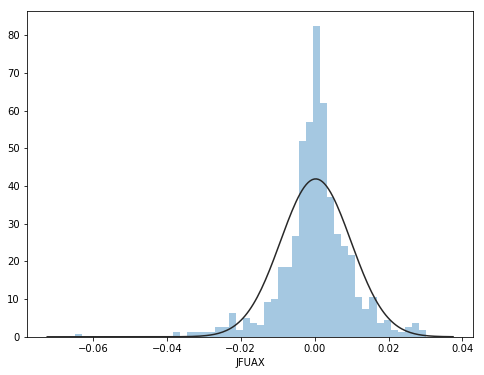

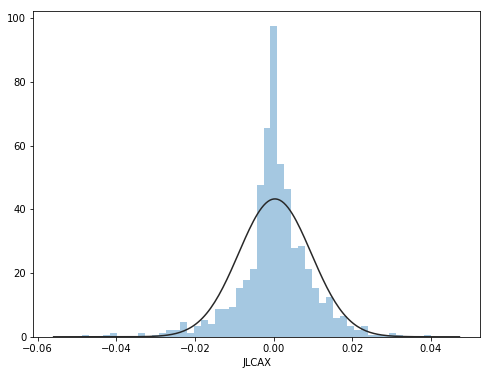

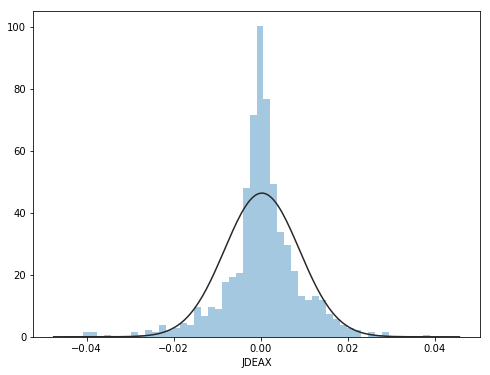

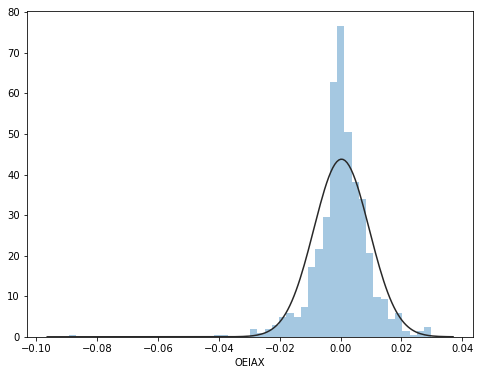

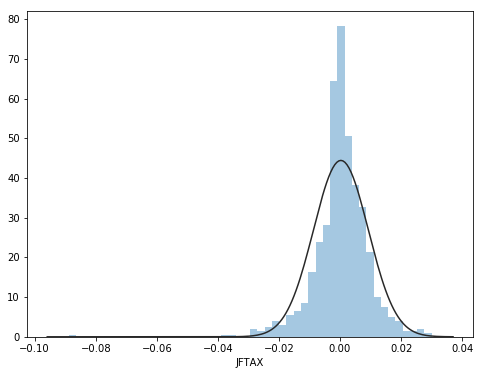

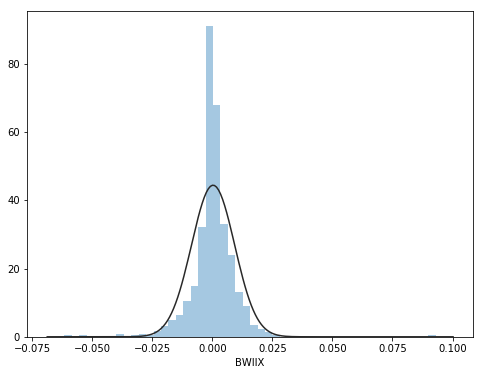

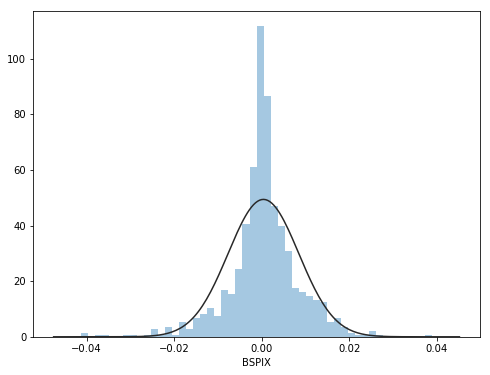

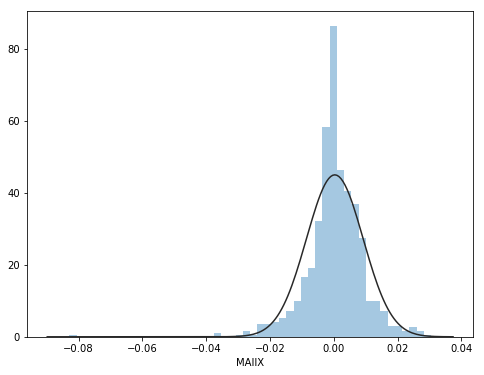

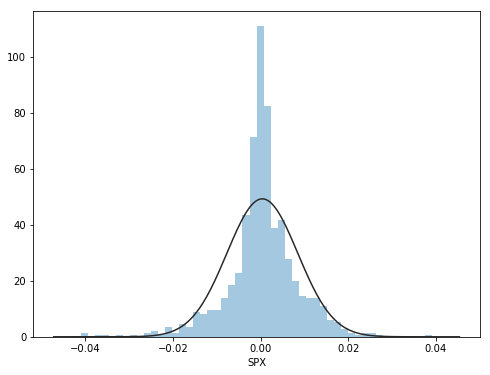

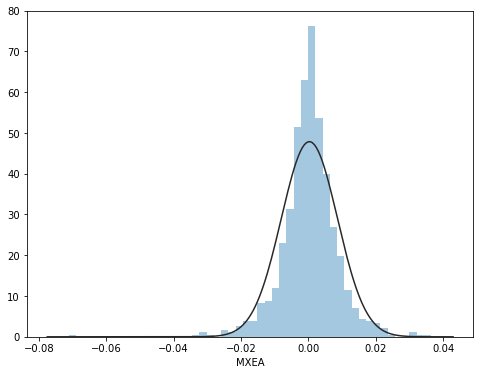

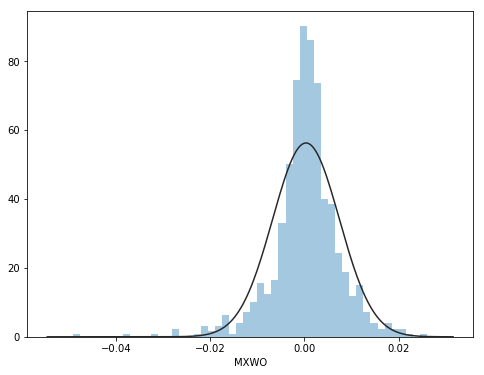

In [31]:
for i in fund_list:
    distplot(i)

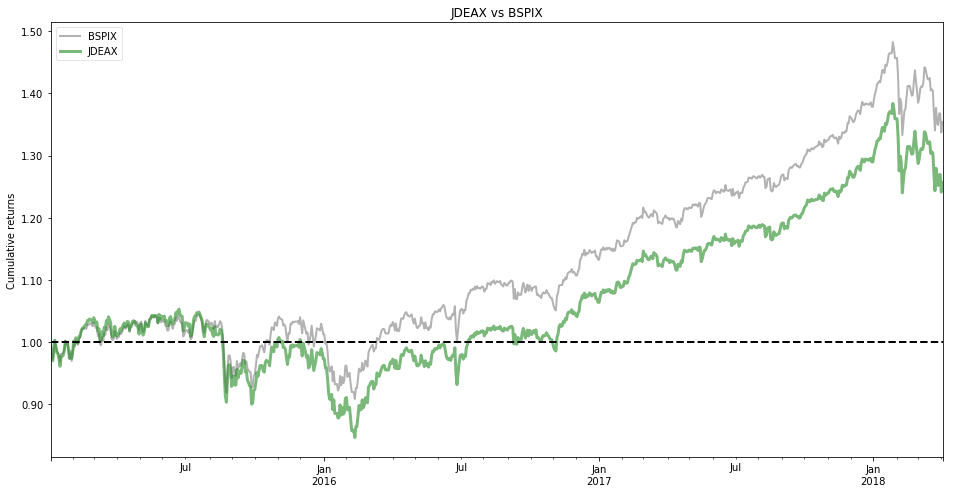

In [23]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

pf.plotting.plot_rolling_returns(returns_df['JDEAX'], returns_df['BSPIX'], backtest_label_replacement='JDEAX', ax=ax)
ax.set_title('JDEAX vs BSPIX')
fig.savefig('JDEAX vs BSPIX')

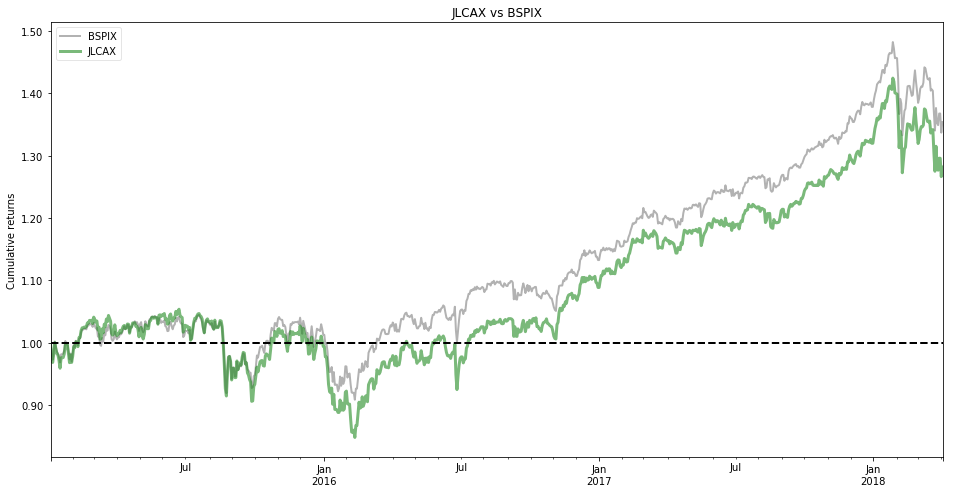

In [24]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
pf.plotting.plot_rolling_returns(returns_df['JLCAX'], returns_df['BSPIX'], backtest_label_replacement='JLCAX', ax=ax)
ax.set_title('JLCAX vs BSPIX')
fig.savefig('JLCAX vs BSPIX')

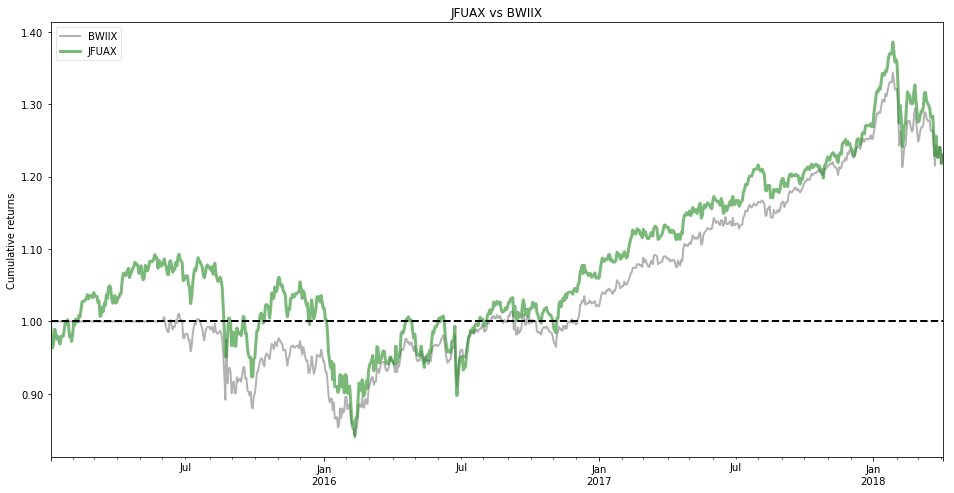

In [25]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
pf.plotting.plot_rolling_returns(returns_df['JFUAX'], returns_df['BWIIX'], backtest_label_replacement='JFUAX', ax=ax)
ax.set_title('JFUAX vs BWIIX')
fig.savefig('JFUAX vs BWIIX')

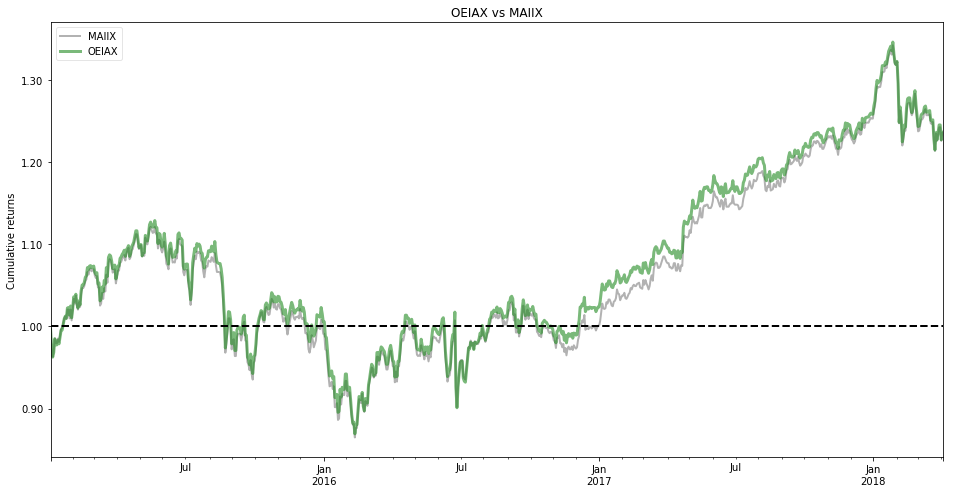

In [26]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
pf.plotting.plot_rolling_returns(returns_df['OEIAX'], returns_df['MAIIX'], backtest_label_replacement='OEIAX', ax=ax)
ax.set_title('OEIAX vs MAIIX')
fig.savefig('OEIAX vs MAIIX')

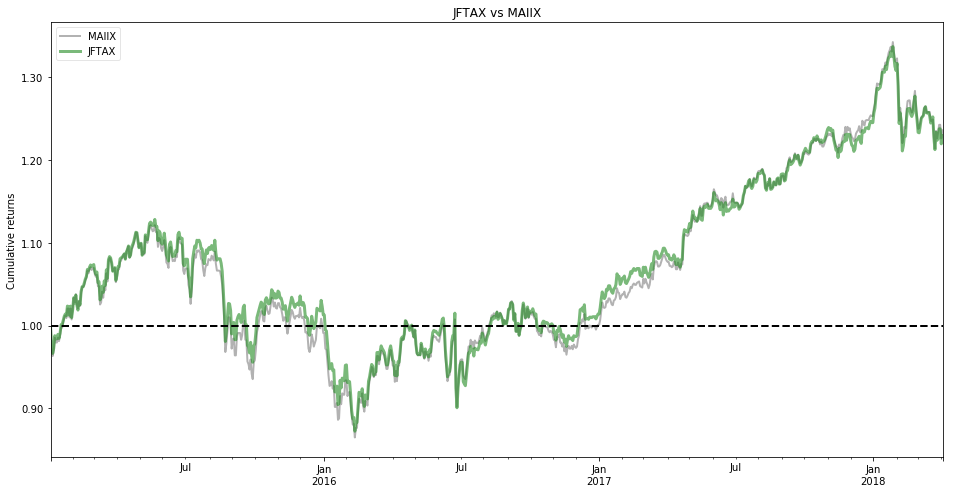

In [27]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
pf.plotting.plot_rolling_returns(returns_df['JFTAX'], returns_df['MAIIX'], backtest_label_replacement='JFTAX', ax=ax)
ax.set_title('JFTAX vs MAIIX')
fig.savefig('JFTAX vs MAIIX')

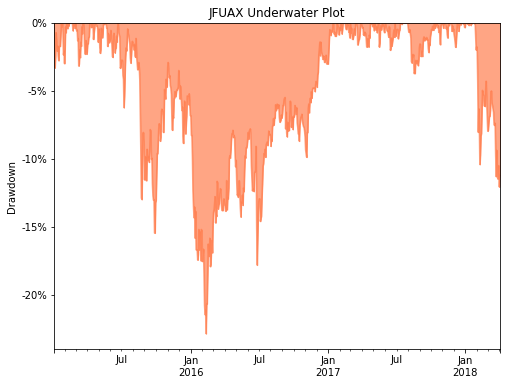

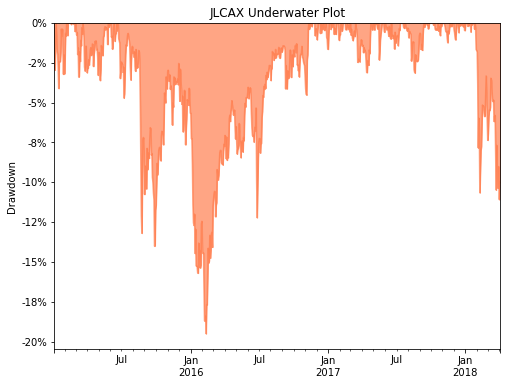

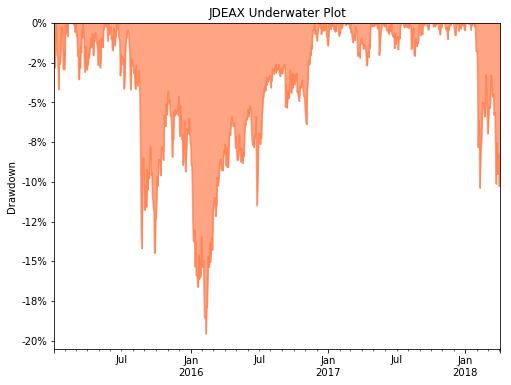

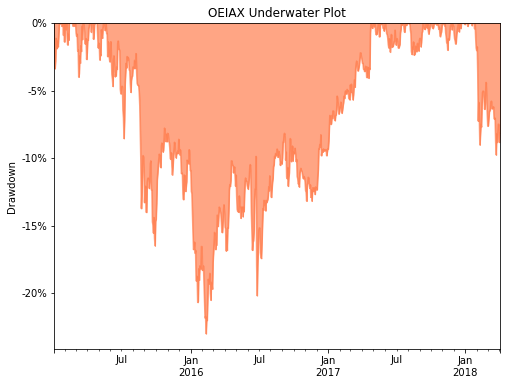

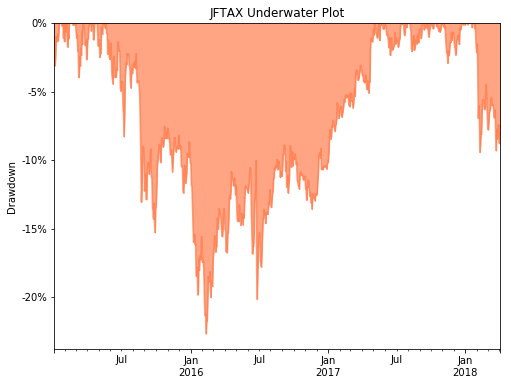

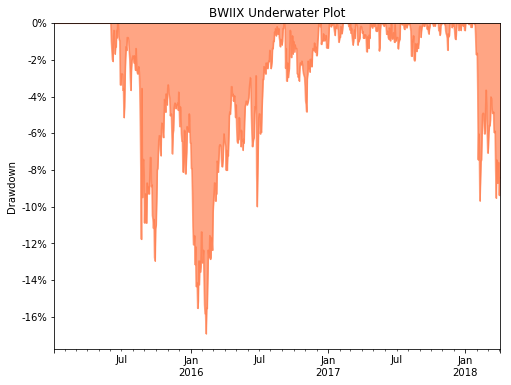

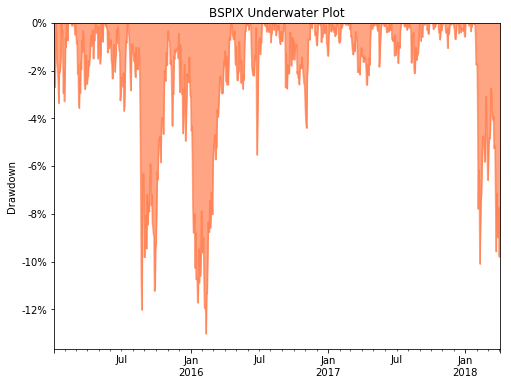

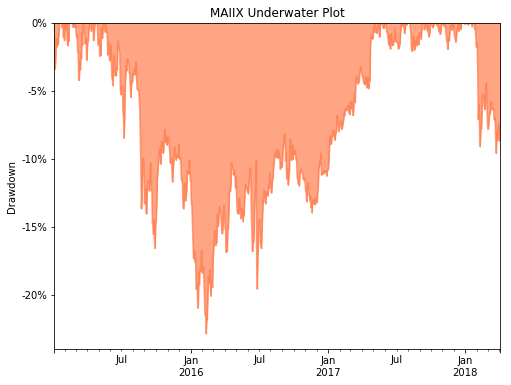

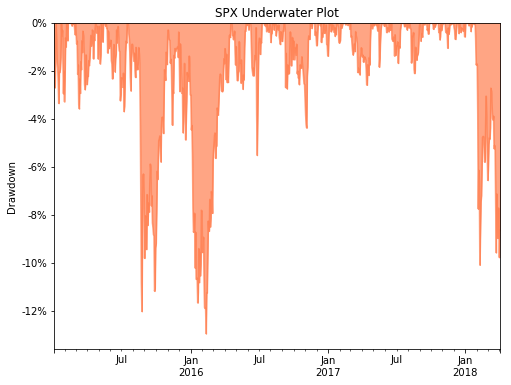

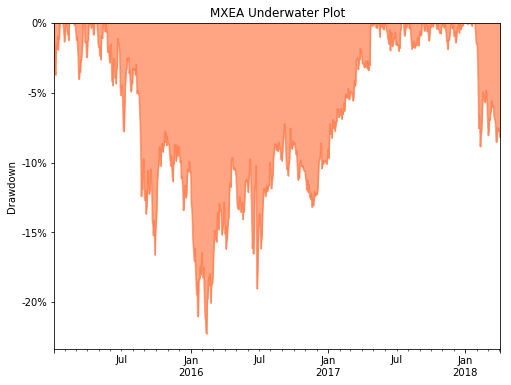

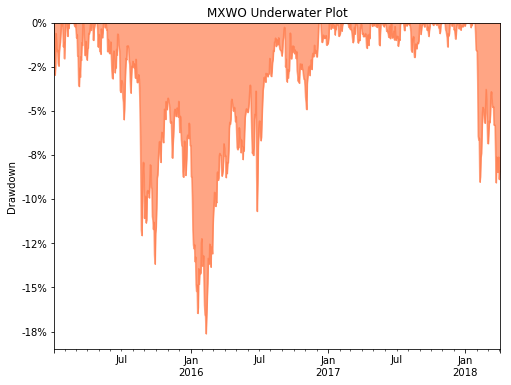

In [49]:
for i in fund_list:
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.set_title('JFTAX vs MAIIX')
    pf.plotting.plot_drawdown_underwater(returns_df[i])
    ax.set_title('%s Underwater Plot'%i)
    fig.savefig('%s Underwater Plot'%i)

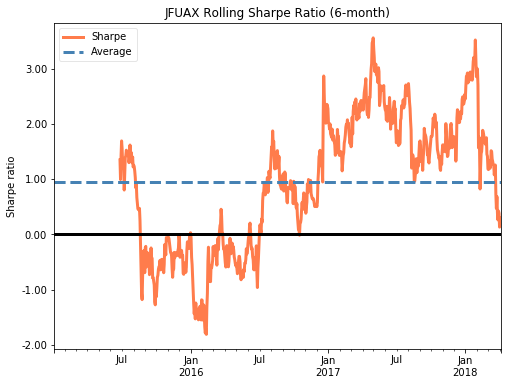

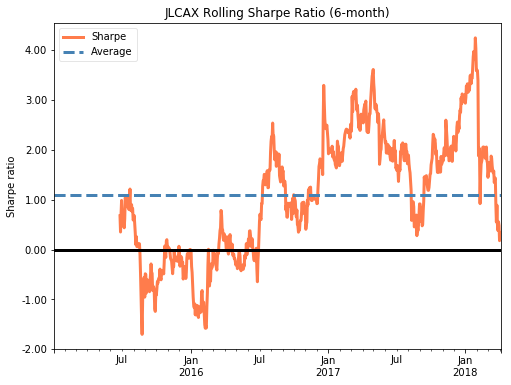

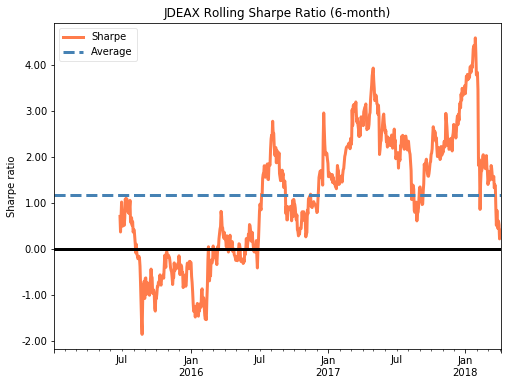

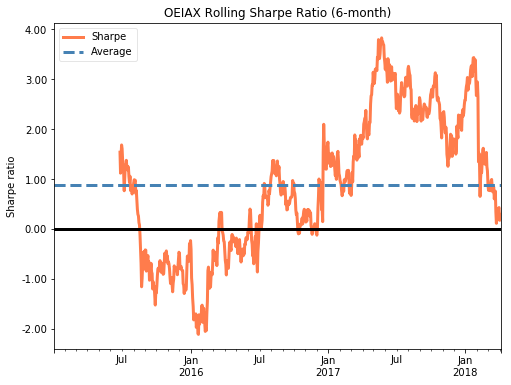

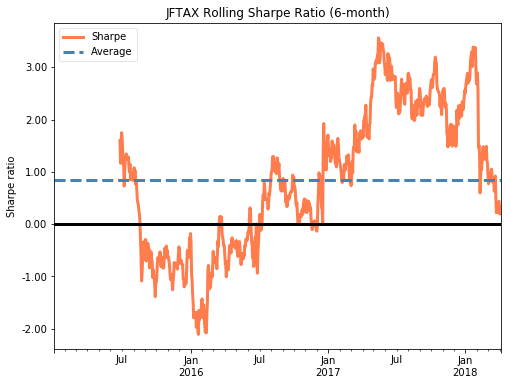

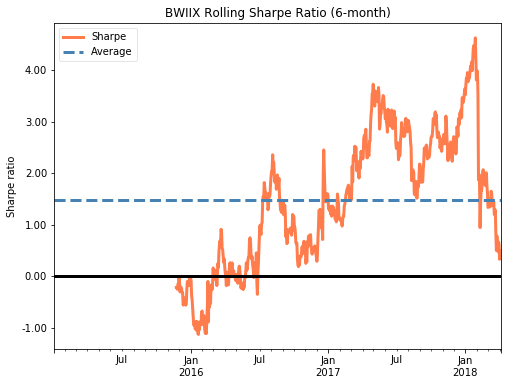

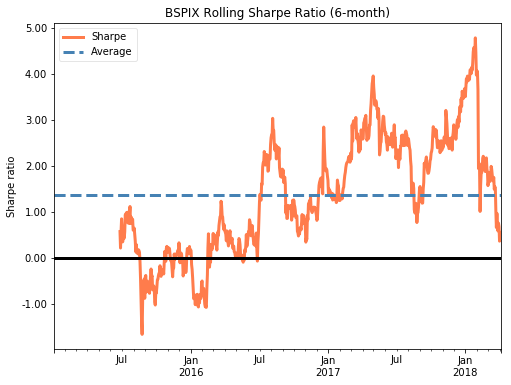

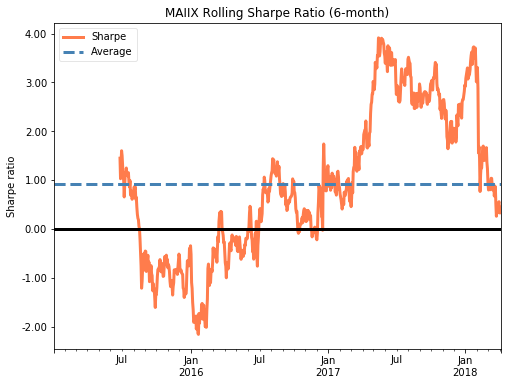

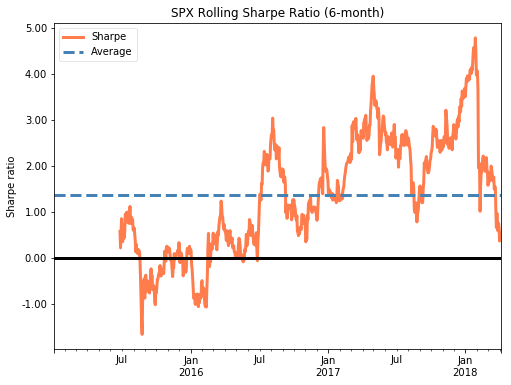

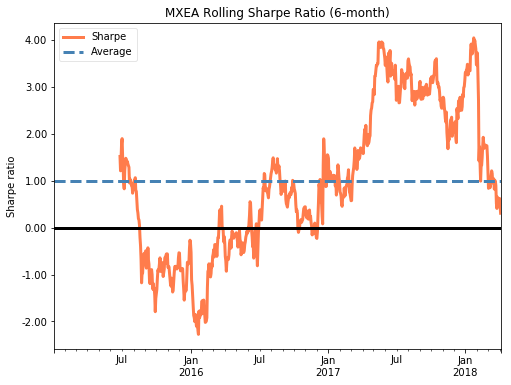

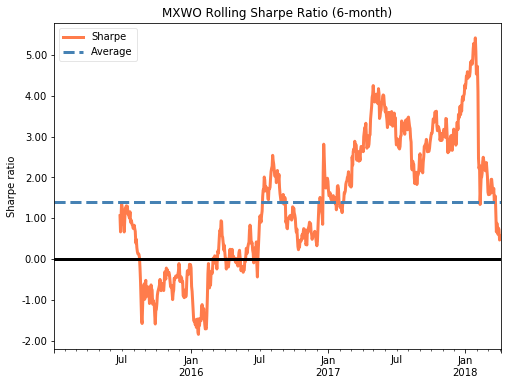

In [13]:
for i in fund_list:    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    pf.plotting.plot_rolling_sharpe(returns_df[i])
    ax.set_title('%s Rolling Sharpe Ratio (6-month)'%i)
    fig.savefig('%s Rolling Sharpe Ratio'%i)

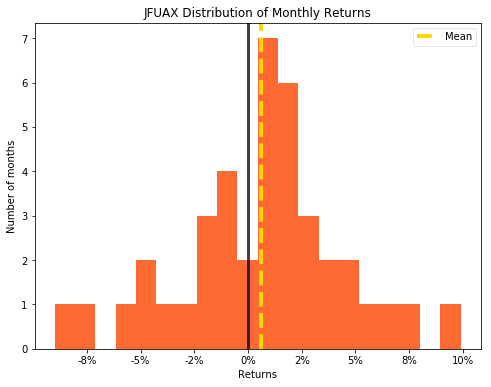

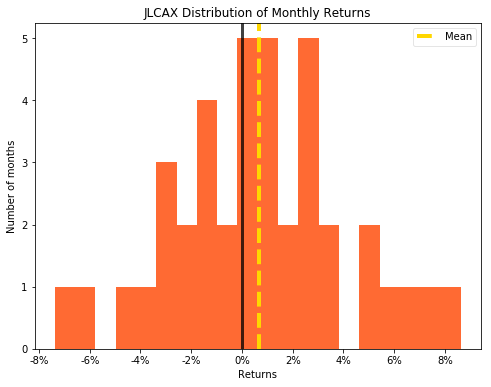

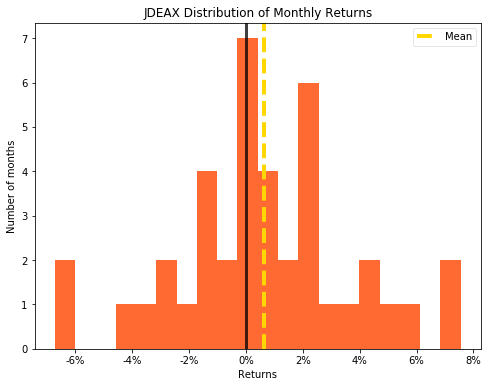

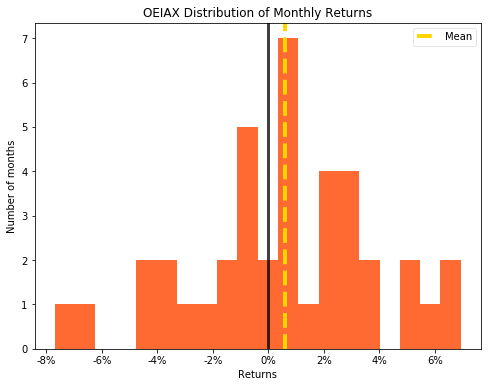

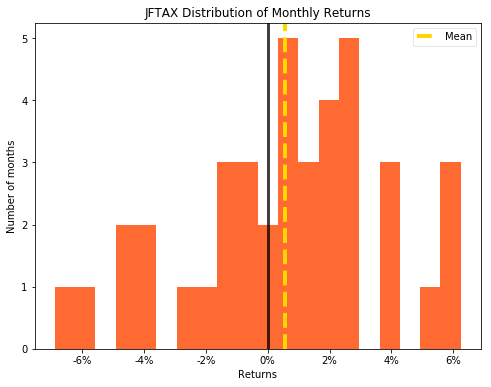

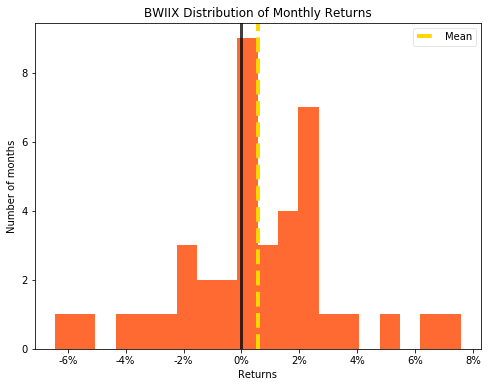

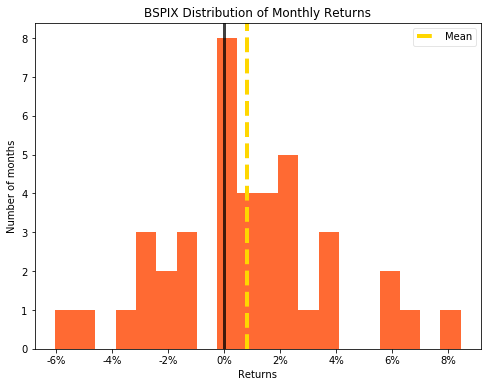

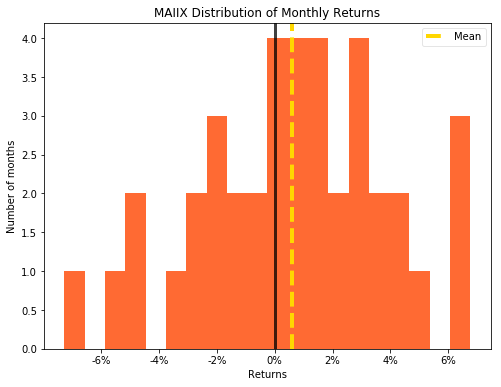

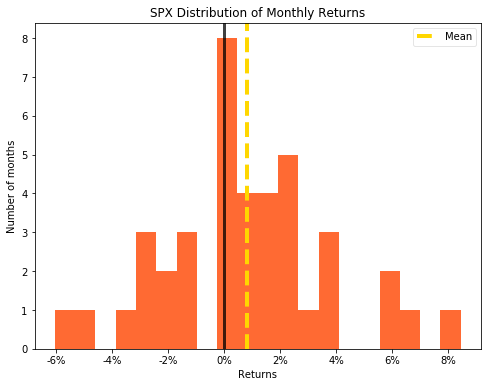

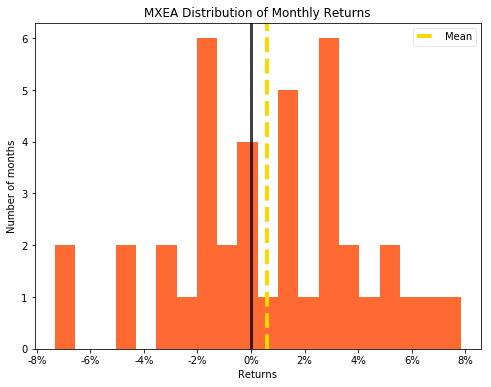

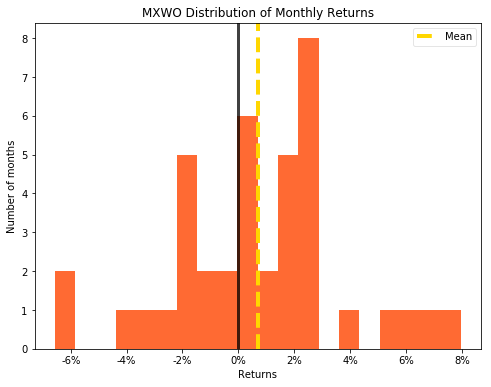

In [15]:
for i in fund_list:    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    pf.plotting.plot_monthly_returns_dist(returns_df[i])
    ax.set_title('%s Distribution of Monthly Returns'%i)
    fig.savefig('%s Distribution of Monthly Returns'%i)

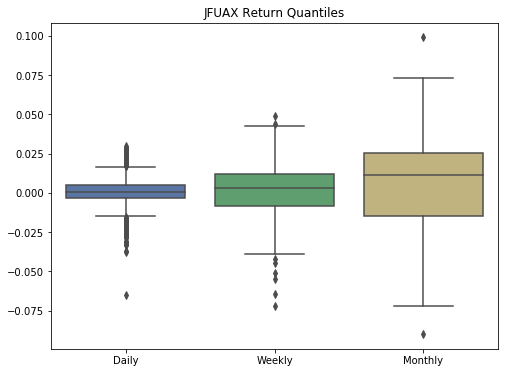

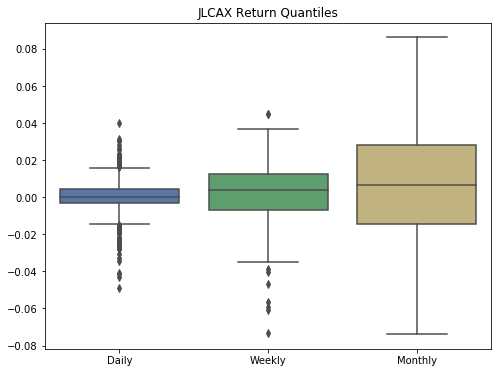

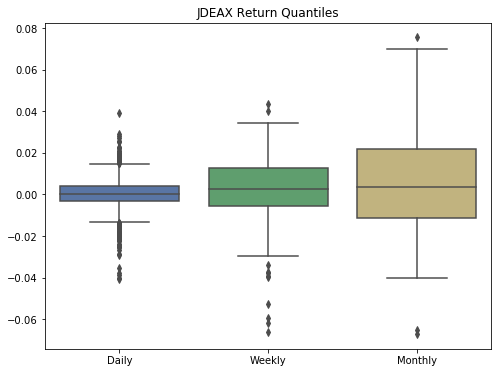

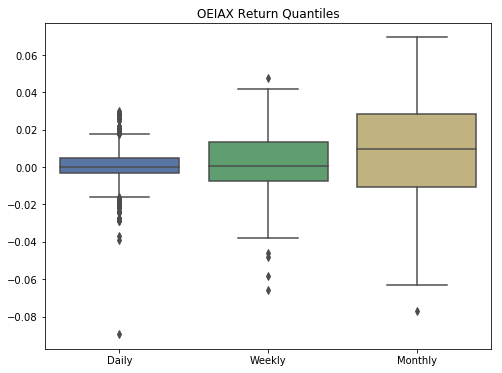

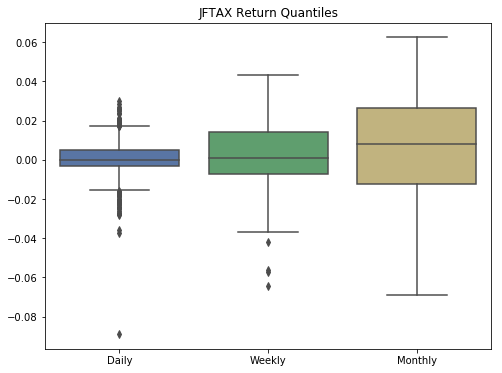

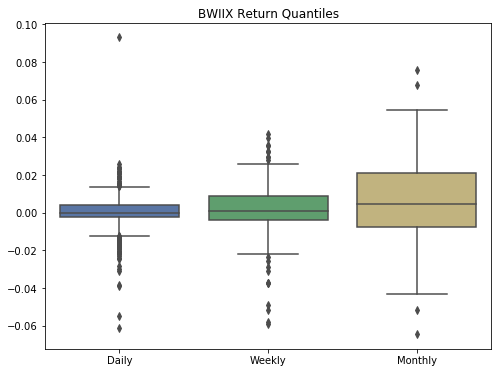

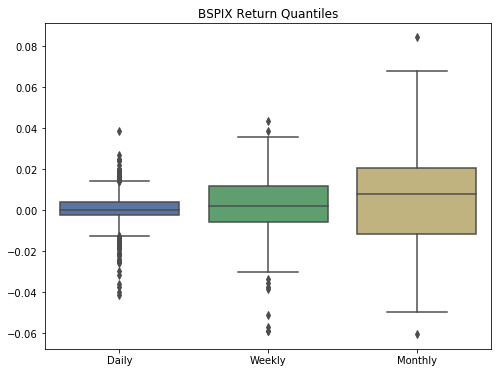

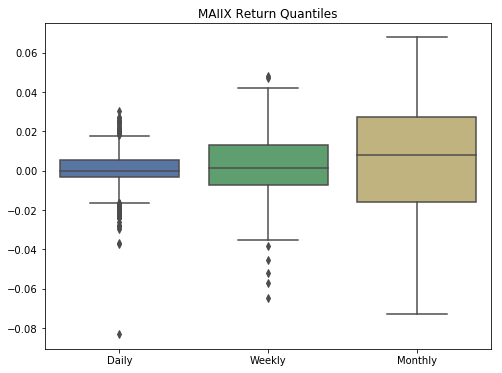

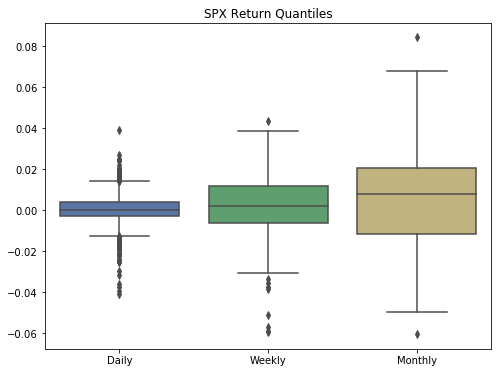

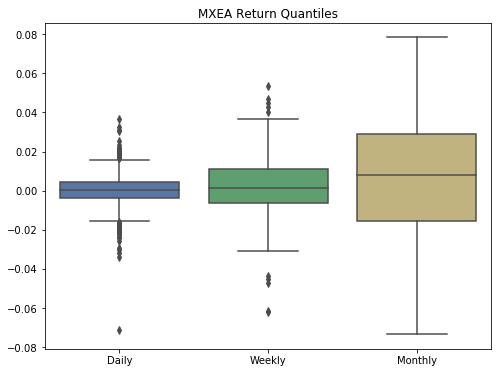

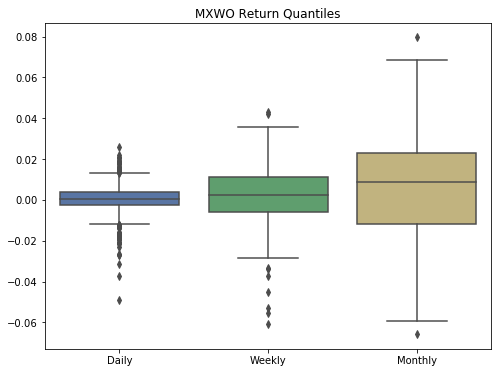

In [17]:
for i in fund_list:    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    pf.plotting.plot_return_quantiles(returns_df[i])
    ax.set_title('%s Return Quantiles'%i)
    fig.savefig('%s Return Quantiles'%i)

C:\Users\Thomas\Anaconda2\lib\site-packages\pandas\core\series.py:1295: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


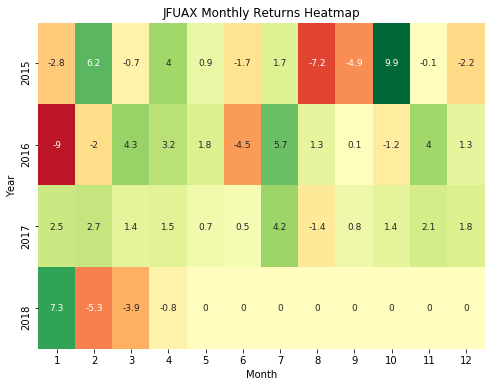

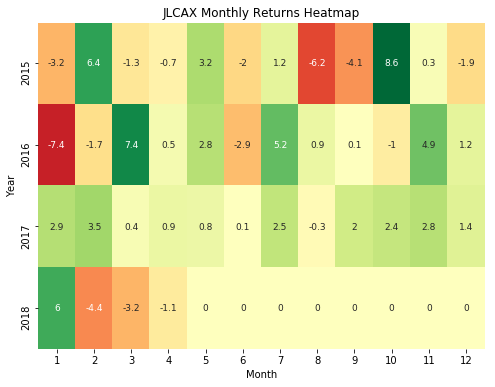

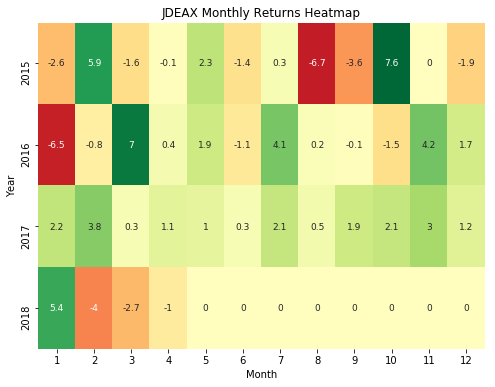

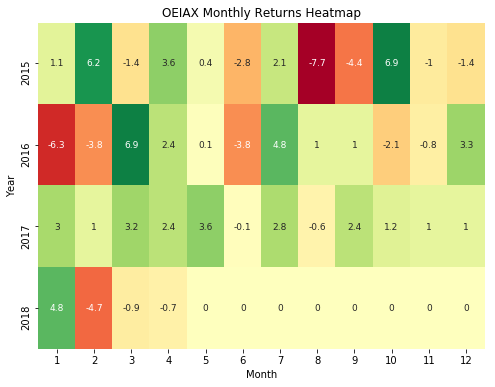

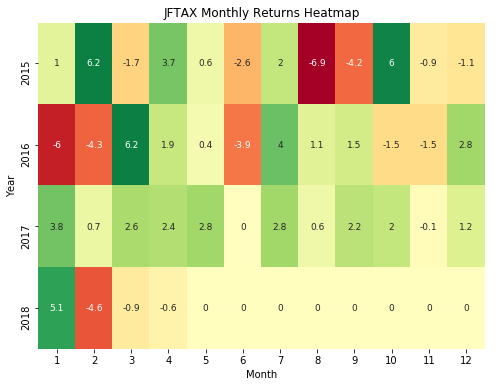

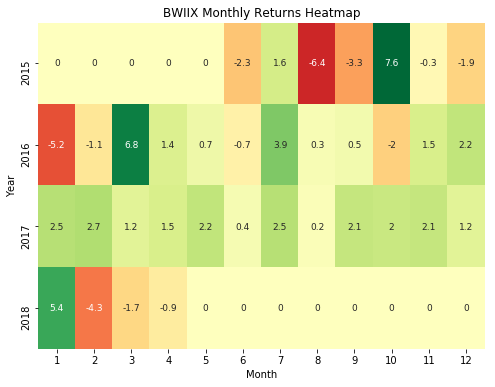

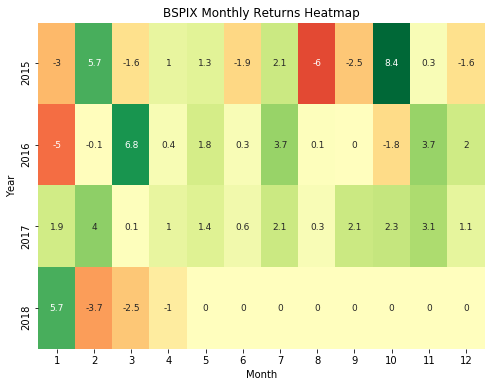

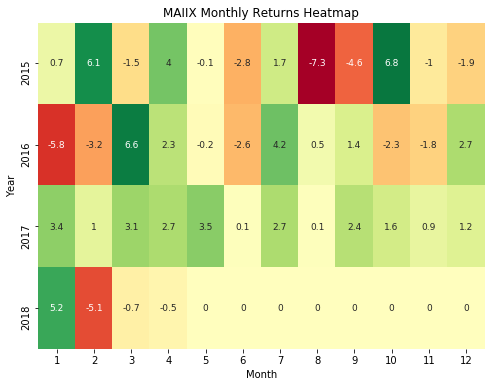

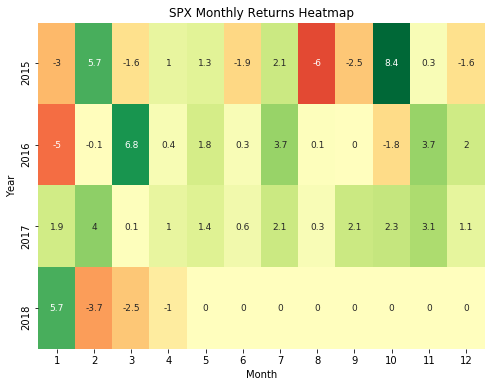

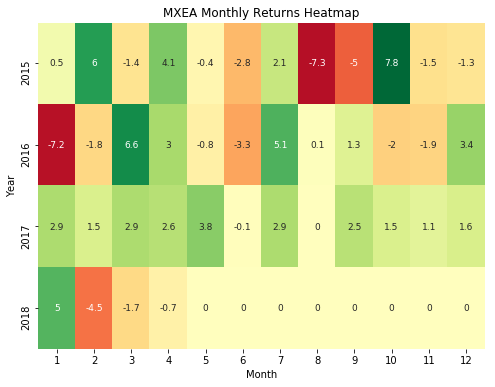

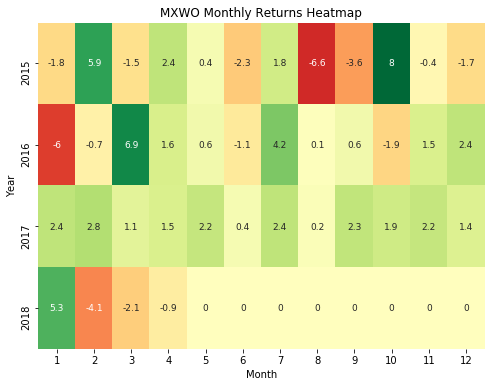

In [32]:
for i in fund_list:    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    pf.plotting.plot_monthly_returns_heatmap(returns_df[i])
    ax.set_title('%s Monthly Returns Heatmap'%i)
    fig.savefig('%s Monthly Returns Heatmap'%i)

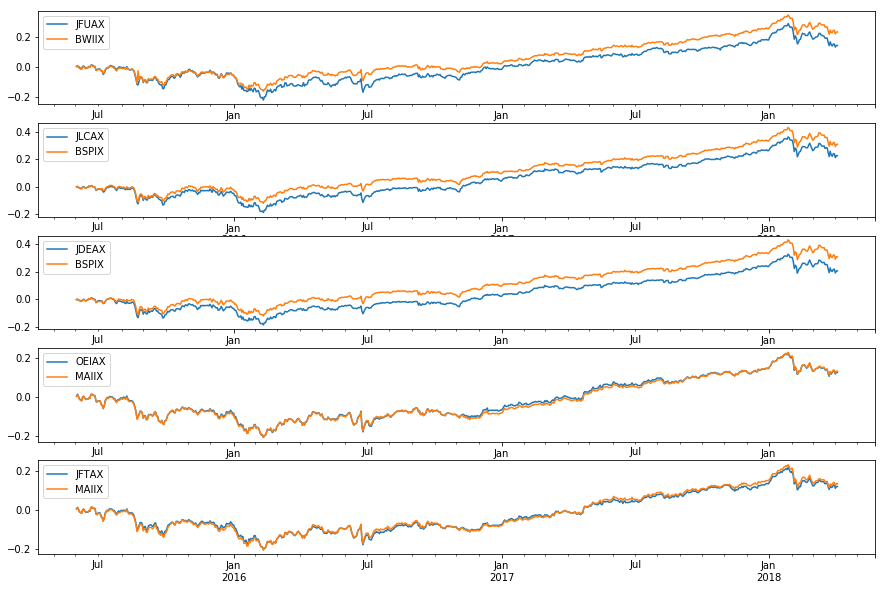

In [11]:
cum_returns_df = ep.cum_returns(returns_df)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,10))
for i, fund in enumerate(utils.get_funds_list()[:5]):
    name, passive_alt = fund.name, fund.passive_alternative
    cum_returns_df[[name, passive_alt]].plot(ax=axes[i])
fig.savefig('cumulative_returns_comparison.png', bbox_inches='tight')